### Columns to keep for Classification:

Here are the categorical features sorted by their correlation coefficients with the target variable (GRADE), from highest to lowest:

* STRATUM: 0.284224
* SCHOOL_NAT: 0.231939
* MOBILE: 0.184504
* SISBEN: 0.183542
* INTERNET: 0.170611
* SCHOOL_TYPE: 0.160435
* UNIVERSITY: 0.155804
* MIC_OVEN: 0.155439
* CAR: 0.154787
* SCHOOL_NAME: 0.141024

In [1]:
# Load the raw Original Dataset
import pandas as pd

pathToRawFile = '../Data/data_academic_performance.csv'

# Load the dataset
df = pd.read_csv(pathToRawFile)
print("Dataframe loaded successfully")

Dataframe loaded successfully


In [2]:
# Add a new label column to the dataset, called 'GRADE' by binning the 'PERCENTILE' column into the following categories: \
# if percentile is less than 50, then GRADE is 'F', \
# if percentile is between 50 and 52.9, then GRADE is 'D-', \ 
# if percentile is between 53 and 56.9, then GRADE is 'D', \ 
# if percentile is between 57 and 59.9, then GRADE is 'D+', \
# if percentile is between 60 and 62.9, then GRADE is 'C-', \
# if percentile is between 63 and 66.9, then GRADE is 'C', \  
# if percentile is between 67 and 69.9, then GRADE is 'C+', \
# if percentile is between 70 and 72.9, then GRADE is 'B-', \
# if percentile is between 73 and 76.9, then GRADE is 'B', \
# if percentile is between 77 and 79.9, then GRADE is 'B+', \
# if percentile is between 80 and 84.9, then GRADE is 'A-', \
# if percentile is between 85 and 89.9, then GRADE is 'A', \
# if percentile is between 90 and 100, then GRADE is 'A+'.
bins = [0, 50, 53, 57, 60, 63, 67, 70, 73, 77, 80, 85, 90, 101]
labels = ['F', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+']
df['GRADE'] = pd.cut(df['PERCENTILE'], bins=bins, labels=labels, include_lowest=True)

print(df['GRADE'].value_counts())   
    

GRADE
A+    3046
F     3045
A     1217
A-     998
B      673
B+     550
C      546
C+     458
D      415
B-     415
C-     368
D+     356
D-     324
Name: count, dtype: int64


In [3]:
# Create a list with the names of the features to be used in the model
features = ['STRATUM', 'SISBEN', 'INTERNET', 'MIC_OVEN', 'CAR', 'MOBILE', 'SCHOOL_TYPE', 'UNIVERSITY', 'SCHOOL_NAT']

# 'SCHOOL_NAME' was intentionally removed from the list of features to avoid overfitting the model

for feature in features:
    print(f"Feature: {feature}")
    print(df[feature].value_counts())
    print("\n")



Feature: STRATUM
STRATUM
Stratum 3    4045
Stratum 2    4029
Stratum 1    1709
Stratum 4    1578
Stratum 5     633
Stratum 6     403
0              14
Name: count, dtype: int64


Feature: SISBEN
SISBEN
It is not classified by the SISBEN           7534
Level 2                                      2120
Level 1                                      2057
Level 3                                       583
Esta clasificada en otro Level del SISBEN      96
0                                              21
Name: count, dtype: int64


Feature: INTERNET
INTERNET
Yes    9752
No     2659
Name: count, dtype: int64


Feature: MIC_OVEN
MIC_OVEN
Yes    8570
No     3841
Name: count, dtype: int64


Feature: CAR
CAR
No     6602
Yes    5809
Name: count, dtype: int64


Feature: MOBILE
MOBILE
Yes    8847
No     3564
Name: count, dtype: int64


Feature: SCHOOL_TYPE
SCHOOL_TYPE
ACADEMIC              7834
TECHNICAL/ACADEMIC    3513
TECHNICAL             1059
Not apply                5
Name: count, dtype: int64



In [4]:
# Remove from the dataset the rows having 'Not apply' in the 'SCHOOL_TYPE' column

df = df[df['SCHOOL_TYPE'] != 'Not apply']
print(df['SCHOOL_TYPE'].value_counts())
df.info()

SCHOOL_TYPE
ACADEMIC              7834
TECHNICAL/ACADEMIC    3513
TECHNICAL             1059
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 12406 entries, 0 to 12410
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   COD_S11           12406 non-null  object  
 1   GENDER            12406 non-null  object  
 2   EDU_FATHER        12406 non-null  object  
 3   EDU_MOTHER        12406 non-null  object  
 4   OCC_FATHER        12406 non-null  object  
 5   OCC_MOTHER        12406 non-null  object  
 6   STRATUM           12406 non-null  object  
 7   SISBEN            12406 non-null  object  
 8   PEOPLE_HOUSE      12406 non-null  object  
 9   INTERNET          12406 non-null  object  
 10  TV                12406 non-null  object  
 11  COMPUTER          12406 non-null  object  
 12  WASHING_MCH       12406 non-null  object  
 13  MIC_OVEN          12406 non-null  object  
 14  CAR 

In [5]:
# Replace all the values in the 'SISBEN' column which are not 'Level 1' or 'Level 2' or 'Level 3' with 'Not classified'
df['SISBEN'] = df['SISBEN'].where(df['SISBEN'].isin(['Level 1', 'Level 2', 'Level 3']), 'Not classified')

# Print the updated 'SISBEN' column value counts
print(df['SISBEN'].value_counts())


SISBEN
Not classified    7647
Level 2           2119
Level 1           2057
Level 3            583
Name: count, dtype: int64


C:\Users\dgane\AppData\Local\Temp\ipykernel_8864\543432579.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


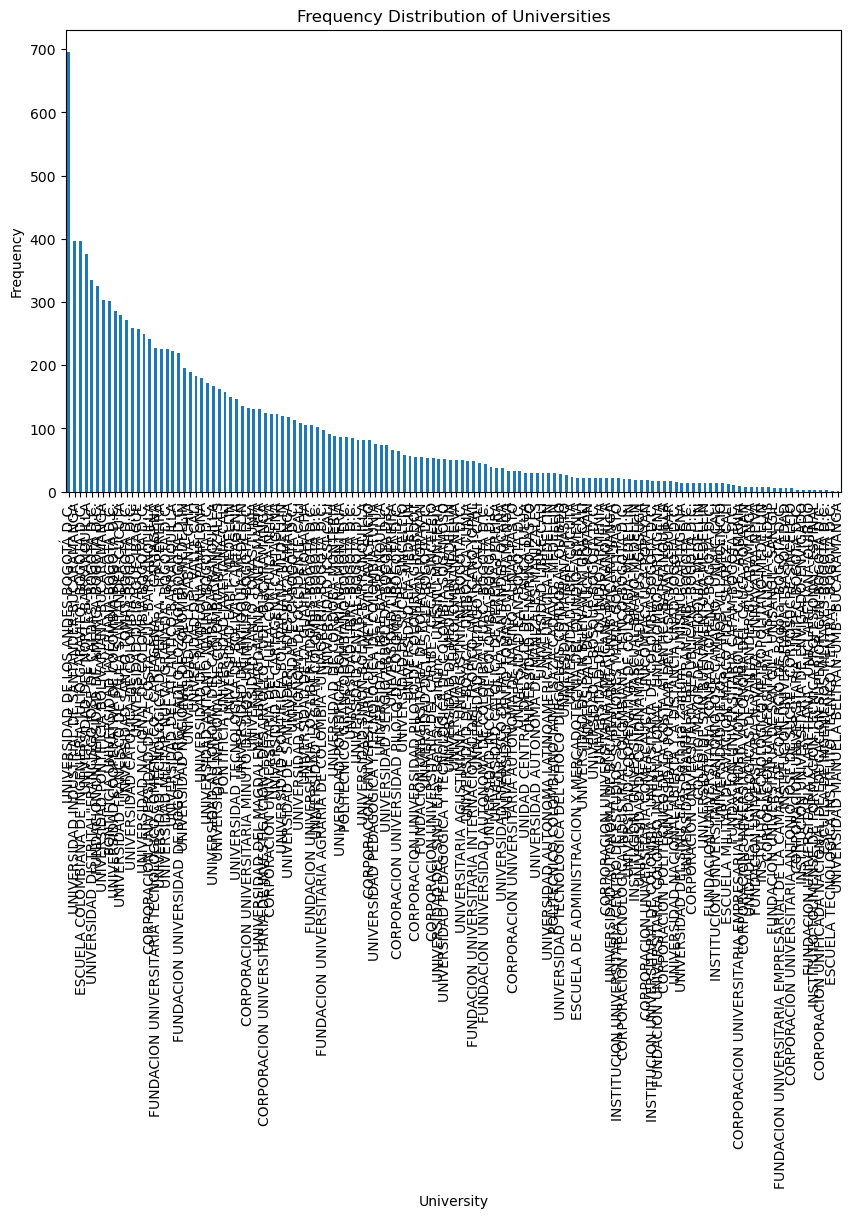

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the frequency of each university
university_counts = df['UNIVERSITY'].value_counts()

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
university_counts.plot(kind='bar')
plt.title('Frequency Distribution of Universities')
plt.xlabel('University')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [7]:
# Set a threshold for the minimum frequency
threshold = 100  # Adjust this threshold as needed

# Get the list of universities below the threshold
lower_frequency_universities = university_counts[university_counts < threshold].index.tolist()

# Replace lower frequency universities with 'Other'
df.loc[df['UNIVERSITY'].isin(lower_frequency_universities), 'UNIVERSITY'] = 'Other'


In [8]:
print(df['UNIVERSITY'].value_counts())

UNIVERSITY
Other                                                                         2937
UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.                                           696
UNIVERSIDAD INDUSTRIAL DE SANTANDER-BUCARAMANGA                                397
ESCUELA COLOMBIANA DE INGENIERIA"JULIO GARAVITO"-BOGOTÁ D.C.                   397
UNIVERSIDAD DEL NORTE-BARRANQUILLA                                             376
UNIVERSIDAD DISTRITAL"FRANCISCO JOSE DE CALDAS"-BOGOTÁ D.C.                    335
FUNDACION UNIVERSIDAD DE AMERICA-BOGOTÁ D.C.                                   326
UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA                                 303
PONTIFICIA UNIVERSIDAD JAVERIANA-BOGOTÁ D.C.                                   302
UNIVERSIDAD COOPERATIVA DE COLOMBIA-BOGOTÁ D.C.                                286
UNIVERSIDAD FRANCISCO DE PAULA SANTANDER-CUCUTA                                279
UNIVERSIDAD SANTO TOMAS-BOGOTÁ D.C.                                         

In [9]:
# Remove zero values from 'STRATUM'
print(df['STRATUM'].value_counts())

# Remove all the rows in the dataset  for which 'STRATUM' column do not contain '1' or '2' or '3' or '4' or '5' or '6'

df = df[df['STRATUM'].isin(['Stratum 1', 'Stratum 2', 'Stratum 3', 'Stratum 4', 'Stratum 5', 'Stratum 6'])]

print(df['STRATUM'].value_counts())


STRATUM
Stratum 3    4044
Stratum 2    4026
Stratum 1    1709
Stratum 4    1577
Stratum 5     633
Stratum 6     403
0              14
Name: count, dtype: int64
STRATUM
Stratum 3    4044
Stratum 2    4026
Stratum 1    1709
Stratum 4    1577
Stratum 5     633
Stratum 6     403
Name: count, dtype: int64


In [10]:
columns = ['STRATUM', 'SISBEN', 'INTERNET', 'MIC_OVEN', 'CAR', 'MOBILE', 'SCHOOL_TYPE', 'UNIVERSITY', 'SCHOOL_NAT', 'QR_PRO', 'CR_PRO',	'CC_PRO', 'ENG_PRO', 'WC_PRO', 'GRADE']

# Keep in the dataset only the columns in the 'columns' list
df = df[columns]

# Remove all the rows in the dataset with missing values
df = df.dropna()

df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
Index: 12392 entries, 0 to 12410
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   STRATUM      12392 non-null  object  
 1   SISBEN       12392 non-null  object  
 2   INTERNET     12392 non-null  object  
 3   MIC_OVEN     12392 non-null  object  
 4   CAR          12392 non-null  object  
 5   MOBILE       12392 non-null  object  
 6   SCHOOL_TYPE  12392 non-null  object  
 7   UNIVERSITY   12392 non-null  object  
 8   SCHOOL_NAT   12392 non-null  object  
 9   QR_PRO       12392 non-null  int64   
 10  CR_PRO       12392 non-null  int64   
 11  CC_PRO       12392 non-null  int64   
 12  ENG_PRO      12392 non-null  int64   
 13  WC_PRO       12392 non-null  int64   
 14  GRADE        12392 non-null  category
dtypes: category(1), int64(5), object(9)
memory usage: 1.4+ MB


,STRATUM,SISBEN,INTERNET,MIC_OVEN,CAR,MOBILE,SCHOOL_TYPE,UNIVERSITY,SCHOOL_NAT,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,GRADE
0,Stratum 4,Not classified,Yes,No,No,Yes,ACADEMIC,UNIVERSIDAD DE SANTANDER - UDES-BUCARAMANGA,PRIVATE,71,93,71,93,79,A+
1,Stratum 5,Not classified,Yes,Yes,Yes,Yes,ACADEMIC,UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.,PRIVATE,97,38,86,98,78,A+
2,Stratum 2,Level 2,No,No,No,No,ACADEMIC,Other,PRIVATE,17,1,18,43,22,F
3,Stratum 2,Not classified,Yes,Yes,No,Yes,ACADEMIC,Other,PRIVATE,65,35,76,80,48,C
4,Stratum 4,Not classified,Yes,No,Yes,Yes,ACADEMIC,UNIVERSIDAD INDUSTRIAL DE SANTANDER-BUCARAMANGA,PRIVATE,94,94,98,100,71,A+


In [ ]:
"""
# Add a new column 'GRADE_NUM' to the dataset, which contains the average values of the 'QR_PRO', 'CR_PRO', 'CC_PRO', 'ENG_PRO', and 'WC_PRO' columns
df['GRADE_NUM'] = df[['QR_PRO', 'CR_PRO', 'CC_PRO', 'ENG_PRO', 'WC_PRO']].mean(axis=1)

# Drop the 'QR_PRO', 'CR_PRO', 'CC_PRO', 'ENG_PRO', and 'WC_PRO' columns
df = df.drop(['QR_PRO', 'CR_PRO', 'CC_PRO', 'ENG_PRO', 'WC_PRO'], axis=1)

df.head()
"""

The grading system in Canada is based on a percentage system, with a score of 90-100% being equivalent to an A, 80-89% to a B, 70-79% to a C, 60-69% to a D, and anything below 60% to an F

In [11]:
# Encode the 'QR_PRO', 'CR_PRO', 'CC_PRO', 'ENG_PRO', and 'WC_PRO' columns into the following categories: \
# if percentile is less than 60, then GRADE is 'F', \
# if percentile is between 60 and 69.9, then GRADE is 'D', \ 
# if percentile is between 70 and 79.9, then GRADE is 'C', \  
# if percentile is between 80 and 89.9, then GRADE is 'B', \
# if percentile is between 90 and 100, then GRADE is 'A', \

bins = [0, 60, 70, 80, 90, 101]
labels = ['F', 'D', 'C', 'B', 'A']
df['QR_PRO'] = pd.cut(df['QR_PRO'], bins=bins, labels=labels, include_lowest=True)
df['CR_PRO'] = pd.cut(df['CR_PRO'], bins=bins, labels=labels, include_lowest=True)
df['CC_PRO'] = pd.cut(df['CC_PRO'], bins=bins, labels=labels, include_lowest=True)
df['ENG_PRO'] = pd.cut(df['ENG_PRO'], bins=bins, labels=labels, include_lowest=True)
df['WC_PRO'] = pd.cut(df['WC_PRO'], bins=bins, labels=labels, include_lowest=True)

df.head()


,STRATUM,SISBEN,INTERNET,MIC_OVEN,CAR,MOBILE,SCHOOL_TYPE,UNIVERSITY,SCHOOL_NAT,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,GRADE
0,Stratum 4,Not classified,Yes,No,No,Yes,ACADEMIC,UNIVERSIDAD DE SANTANDER - UDES-BUCARAMANGA,PRIVATE,C,A,C,A,C,A+
1,Stratum 5,Not classified,Yes,Yes,Yes,Yes,ACADEMIC,UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.,PRIVATE,A,F,B,A,C,A+
2,Stratum 2,Level 2,No,No,No,No,ACADEMIC,Other,PRIVATE,F,F,F,F,F,F
3,Stratum 2,Not classified,Yes,Yes,No,Yes,ACADEMIC,Other,PRIVATE,D,F,C,C,F,C
4,Stratum 4,Not classified,Yes,No,Yes,Yes,ACADEMIC,UNIVERSIDAD INDUSTRIAL DE SANTANDER-BUCARAMANGA,PRIVATE,A,A,A,A,C,A+


In [12]:
# One-hot encode the categorical columns: 'STRATUM', 'SISBEN', 'INTERNET', 'MIC_OVEN', 'CAR', 'MOBILE', 'SCHOOL_TYPE', 'UNIVERSITY', 'SCHOOL_NAT', and 'GRADE_NUM'
df = pd.get_dummies(df, columns=['STRATUM', 'SISBEN', 'INTERNET', 'MIC_OVEN', 'CAR', 'MOBILE', 'SCHOOL_TYPE', 'UNIVERSITY', 'SCHOOL_NAT', 'QR_PRO', 'CR_PRO', 'CC_PRO', 'ENG_PRO', 'WC_PRO',])
df.head()

,GRADE,STRATUM_Stratum 1,STRATUM_Stratum 2,STRATUM_Stratum 3,STRATUM_Stratum 4,STRATUM_Stratum 5,STRATUM_Stratum 6,SISBEN_Level 1,SISBEN_Level 2,SISBEN_Level 3,...,ENG_PRO_F,ENG_PRO_D,ENG_PRO_C,ENG_PRO_B,ENG_PRO_A,WC_PRO_F,WC_PRO_D,WC_PRO_C,WC_PRO_B,WC_PRO_A
0,A+,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,A+,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,F,False,True,False,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
3,C,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,A+,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [13]:
# Save the cleaned dataset to a new file in ../Data/ directory
pathToCleanedFile = '../Data/cleaned_data.csv'
df.to_csv(pathToCleanedFile, index=False)
print(f"Cleaned dataset saved to {pathToCleanedFile}")


Cleaned dataset saved to ../Data/cleaned_data.csv
